# 🔹 Step 1: Import libraries and load dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load California housing dataset

In [3]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedHouseVal")

# For visualization, we take only one feature (MedInc - median income)
X = X[["MedInc"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 🔹 Step 2: Manual Linear Regression (Gradient Descent)

In [4]:
class CustomLinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]   # Add bias term
        self.theta = np.zeros(X_b.shape[1])        # Initialize weights
        
        for _ in range(self.epochs):
            gradients = -2/X_b.shape[0] * X_b.T.dot(y - X_b.dot(self.theta))
            self.theta -= self.lr * gradients
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)


In [7]:
# Train custom model
custom_model = CustomLinearRegressionGD(lr=0.1, epochs=1000)
custom_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_custom = custom_model.predict(X_test_scaled)

# 🔹 Step 3: Scikit-learn Linear Regression

In [10]:
sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)
y_pred_sk = sk_model.predict(X_test_scaled)

# 🔹 Step 4: Evaluation Metrics

In [11]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² : {r2:.4f}\n")

evaluate(y_test, y_pred_custom, "Custom Gradient Descent")
evaluate(y_test, y_pred_sk, "Scikit-learn LinearRegression")

Custom Gradient Descent Performance:
  MSE: 0.7091
  MAE: 0.6299
  R² : 0.4589

Scikit-learn LinearRegression Performance:
  MSE: 0.7091
  MAE: 0.6299
  R² : 0.4589



# 🔹 Step 5: Visualization

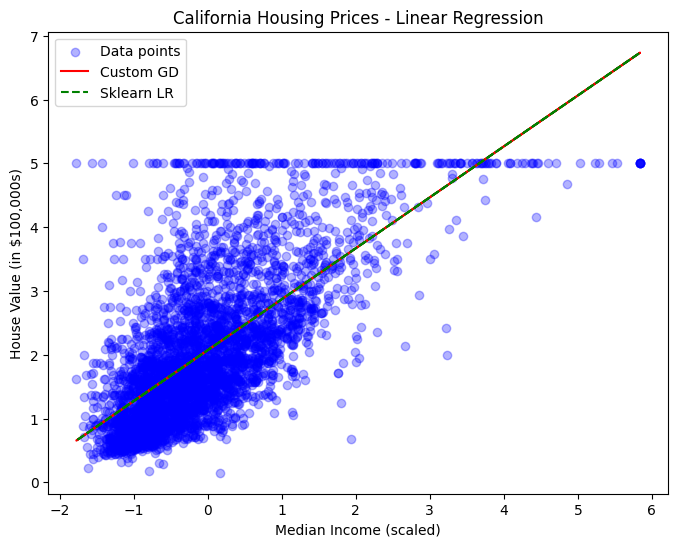

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_scaled, y_test, color="blue", alpha=0.3, label="Data points")

# Predictions
plt.plot(X_test_scaled, y_pred_custom, color="red", label="Custom GD")
plt.plot(X_test_scaled, y_pred_sk, color="green", linestyle="--", label="Sklearn LR")

plt.xlabel("Median Income (scaled)")
plt.ylabel("House Value (in $100,000s)")
plt.title("California Housing Prices - Linear Regression")
plt.legend()
plt.show()